In [124]:
import numpy as np
from sklearn.cross_validation import train_test_split
import cv2
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import imshow
%matplotlib inline

In [125]:
def read_files(directory):
    print ("Reading files...")
    s = 1
    feature_list = list()
    label_list   = list()
    num_classes = 0
    for root, dirs, files in os.walk(directory):
        for d in dirs:
            num_classes += 1
            images = os.listdir(root+d)
            for image in images:
                s += 1
                label_list.append(d)
                feature_list.append(extract_feature(root+d+"/"+image))

    print (str(num_classes) + " classes")
    return np.asarray(feature_list), np.asarray(label_list)

def extract_feature(image_file):
    SHAPE = (24, 8)
    img = cv2.imread(image_file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, SHAPE, interpolation = cv2.INTER_CUBIC)
    img = img.flatten()
    #img = img/(np.mean(img)+0.0001)
    return img


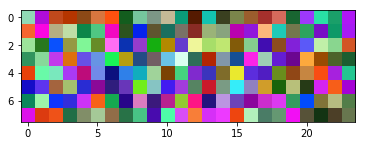

In [126]:
feature_mean = np.mean(feature_array, axis = 0)
# Then plot the mean image.
plt.figure()
plt.imshow(feature_mean.reshape((8, 24, 3)))

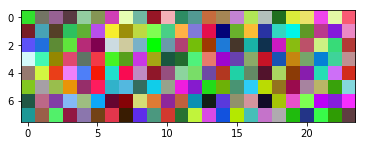

In [127]:
feature_std = np.std(feature_array, axis=0)
plt.figure()
plt.imshow(feature_std.reshape((8, 24, 3)))

In [128]:
directory = './Classifier/data/'
feature_array, label_array = read_files(directory)
print(feature_array.shape, label_array.shape)
# Splitting the data into test and training splits
X_train, X_test, y_train, y_test = train_test_split(feature_array, label_array, test_size=0.2, random_state=42)

Reading files...
3 classes
(1801, 576) (1801,)


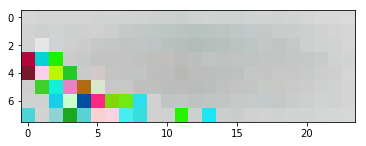

In [129]:
#img = np.reshape(X_train[1400]*(np.mean(X_train[1400])+0.0001), (8,24,3))
img = np.reshape((X_train[900]-feature_mean)/feature_std, (8,24,3))
imshow(img)
#imshow(X_train[1400])

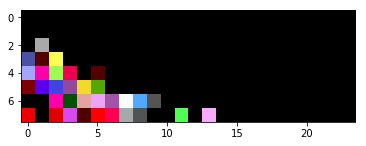

In [130]:
#img = np.reshape(X_train[1400]*(np.mean(X_train[1400])+0.0001), (8,24,3))
img = np.reshape(X_train[900]/ (np.mean(X_train[900]+0.0001)), (8,24,3))
imshow(img)
#imshow(X_train[1400])

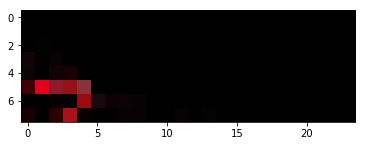

In [131]:
#img = np.reshape(X_train[1400]*(np.mean(X_train[1400])+0.0001), (8,24,3))
img = np.reshape(X_train[900]/255, (8,24,3))
imshow(img)

In [133]:
X_train/255

array([[ 0.        ,  0.        ,  0.        , ...,  0.05098039,
         0.07058824,  0.0745098 ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [135]:
# Save the data to a numpy file array.
np.save('feature_semaforos.npy', feature_array)
np.save('label_semaforos.npy', label_array)

In [106]:
print(x_train.shape)


(60000, 28, 28)
